In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## IMPORT DATASETS

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
Name,891,891,"Van Impe, Miss. Catharina",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [0]:
def unique_count(train,columns):
    for column in columns:
        print("\n"+"for column "+column)
        print(train[column].value_counts())

columns=["Sex", "Embarked", "Survived", "Pclass"]

unique_count(train,columns)
        
        
    
    


for column Sex
male      577
female    314
Name: Sex, dtype: int64

for column Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

for column Survived
0    549
1    342
Name: Survived, dtype: int64

for column Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Preprocessing and Feature Engineering

In [0]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [0]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [0]:
debs = {'T': 'n'}
train['Cabin_Letter'] = train['Cabin_Letter'].replace(debs)

In [0]:
test['Cabin_Letter'] = test['Cabin'].apply(lambda x: str(x)[0])
test['Cabin_Letter'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin_Letter, dtype: int64

In [0]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
n    0.299419
Name: Survived, dtype: float64

In [0]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [0]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])


# New Section

In [0]:
train['Cabin_num'].replace('an', np.NaN, inplace = True)


In [0]:
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [0]:
pd.qcut(train['Cabin_num'], 3).value_counts()

(65.667, 148.0]     67
(1.999, 28.667]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [0]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [0]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [0]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Jonkheer.      1
Lady.          1
Mme.           1
Ms.            1
the            1
Capt.          1
Sir.           1
Don.           1
Name: Name_Title, dtype: int64

In [0]:
text = "Deborah, Ms. Alenkhe Sweetheart"
text_process = text.split(',')[1]
print(text_process)
text_split = text_process.split()[0]
print(text_split)

 Ms. Alenkhe Sweetheart
Ms.


In [0]:
split_text = text.split(',')
print(split_text)

['Deborah', ' Ms. Alenkhe Sweetheart']


In [0]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_num,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,NaN,Mr.


In [0]:
test['Name_Title'] = test['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
test['Name_Title'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rev.         2
Col.         2
Dr.          1
Ms.          1
Dona.        1
Name: Name_Title, dtype: int64

In [0]:
status_test = {
    'Mr.':1 , 'Miss.':0 , 'Mrs.':1, 'Master.':0, 'Col.':1, 'Rev.':0, 'Ms.':0, 'Dona.':1, 'Dr.':1
}
test['marital_status'] = test['Name_Title'].replace(status_test)
    

In [0]:
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Jonkheer.      1
Lady.          1
Mme.           1
Ms.            1
the            1
Capt.          1
Sir.           1
Don.           1
Name: Name_Title, dtype: int64

In [0]:
status_train = {
    'Mr.':1 , 'Miss.':0 , 'Mrs.':1, 'Master.':0, 'Dr.':1, 'Rev.':0, 'Mlle.':0, 'Col.':1, 'Major.':1, 'Jonkheer.':0, 'Mme.':1, 'Don.':1, 'Ms.':0, 'Lady.':1, 'Capt.':1, 'the':0, 'Sir.':1
}
train['marital_status'] = train['Name_Title'].replace(status_train)

In [0]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_num,Name_Title,marital_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,NaN,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85.0,Mrs.,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,NaN,Miss.,0


In [0]:
feature_removal = ['Name', 'Ticket', 'Cabin', 'Name_Title' ]
dataset = [train, test] 
for data in dataset:
  data.drop(data[feature_removal], axis=1, inplace=True)

In [0]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter,Cabin_num,marital_status
0,1,0,3,male,22.0,1,0,7.2500,S,n,NaN,1
1,2,1,1,female,38.0,1,0,71.2833,C,C,85.0,1
2,3,1,3,female,26.0,0,0,7.9250,S,n,NaN,0


In [0]:
del train['Cabin_num']

In [0]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Letter,marital_status
0,892,3,male,34.5,0,0,7.8292,Q,n,1
1,893,3,female,47.0,1,0,7.0000,S,n,1
2,894,2,male,62.0,0,0,9.6875,Q,n,1
3,895,3,male,27.0,0,0,8.6625,S,n,1
4,896,3,female,22.0,1,1,12.2875,S,n,1


In [0]:
dummy_list = ['Sex', 'Embarked', 'Cabin_Letter']
train = pd.get_dummies(train, prefix=dummy_list, columns=dummy_list)
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,marital_status,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_n
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,1,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,1,0,1,0,0,0,0,1,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [0]:
train.shape

(891, 21)

In [0]:
test = pd.get_dummies(test, prefix=dummy_list, columns=dummy_list)
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,marital_status,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_C,Cabin_Letter_D,Cabin_Letter_E,Cabin_Letter_F,Cabin_Letter_G,Cabin_Letter_n
0,892,3,34.5,0,0,7.8292,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,893,3,47.0,1,0,7.0000,1,1,0,0,0,1,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0,1,0,0,0,0,0,0,0,0,1


In [0]:
test.shape

(418, 20)

In [0]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'marital_status', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_C',
       'Cabin_Letter_D', 'Cabin_Letter_E', 'Cabin_Letter_F', 'Cabin_Letter_G',
       'Cabin_Letter_n'],
      dtype='object')

In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'marital_status', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_C',
       'Cabin_Letter_D', 'Cabin_Letter_E', 'Cabin_Letter_F', 'Cabin_Letter_G',
       'Cabin_Letter_n'],
      dtype='object')

































Impute missing values and applying algorithms

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Age             714 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   marital_status  891 non-null    int64  
 8   Sex_female      891 non-null    uint8  
 9   Sex_male        891 non-null    uint8  
 10  Embarked_C      891 non-null    uint8  
 11  Embarked_Q      891 non-null    uint8  
 12  Embarked_S      891 non-null    uint8  
 13  Cabin_Letter_A  891 non-null    uint8  
 14  Cabin_Letter_B  891 non-null    uint8  
 15  Cabin_Letter_C  891 non-null    uint8  
 16  Cabin_Letter_D  891 non-null    uint8  
 17  Cabin_Letter_E  891 non-null    uin

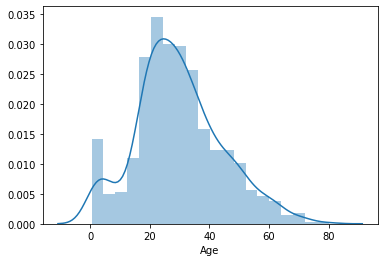

In [0]:
sns.distplot(train['Age'], hist= True)

Check for outliers, Use another metbod of imputation, try out dimensionailty reduction, try scaling 


In [0]:
from sklearn.impute import SimpleImputer

In [0]:

mean = train['Age'].mean()
train['Age'].fillna(mean, inplace=True)

In [0]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [0]:
train['Age'].isna().sum()

0

Text(0.5, 1.0, 'Correlation plot')

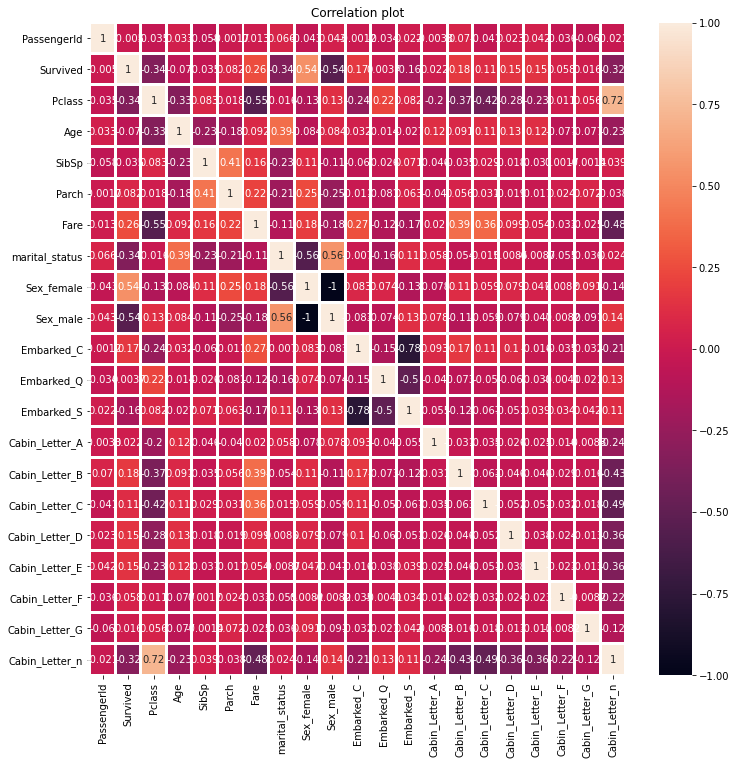

In [0]:
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(train.corr(), linewidths= 2.0, ax= ax, annot= True)
ax.set_title('Correlation plot')

In [0]:
test.shape

(418, 20)

In [0]:
train.shape

(891, 21)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
del test['PassengerId']

In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'marital_status', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_C',
       'Cabin_Letter_D', 'Cabin_Letter_E', 'Cabin_Letter_F', 'Cabin_Letter_G',
       'Cabin_Letter_n'],
      dtype='object')

In [0]:
feature_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'marital_status', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_C',
       'Cabin_Letter_D', 'Cabin_Letter_E', 'Cabin_Letter_F', 'Cabin_Letter_G',
       'Cabin_Letter_n']
predicted_class_names =['Survived'] 
X=train[feature_col].values 
y=train[predicted_class_names].values 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30,  random_state=42)

In [0]:
# CONFIRMING SPLIT ACCURACY
print("{0:0.3f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.3f}% in test set".format((len(X_test)/len(train.index)) * 100))

69.921% in training set
30.079% in test set


In [0]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
import sklearn.metrics as sklm
from math import sqrt

In [0]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print(conf)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [0]:
predicted_train = reg.predict_proba(X_train)
print_metrics(y_train, predicted_train, 0.5)

[[338  54]
 [ 66 165]]
                 Confusion matrix
                 Score positive    Score negative
Actual positive       338                54
Actual negative        66               165

Accuracy        0.81
AUC             0.86
Macro precision 0.80
Macro recall    0.79
 
           Positive      Negative
Num case      392           231
Precision    0.84          0.75
Recall       0.86          0.71
F1           0.85          0.73


In [0]:
predicted_test = reg.predict_proba(X_test)
print_metrics(y_test, predicted_test, 0.5)

[[136  21]
 [ 30  81]]
                 Confusion matrix
                 Score positive    Score negative
Actual positive       136                21
Actual negative        30                81

Accuracy        0.81
AUC             0.88
Macro precision 0.81
Macro recall    0.80
 
           Positive      Negative
Num case      157           111
Precision    0.82          0.79
Recall       0.87          0.73
F1           0.84          0.76


In [0]:
submission = pd.read_csv("submission.csv")
submission.head(5)

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [0]:
predicted = reg.predict(test)
my_submission = pd.DataFrame({"PassengerId": submission.PassengerId,"Survived":predicted})
my_submission.to_csv("Titanic_Submission.csv", index = False)